# Using PyTorch for Classification Problems

I will explore some basic tools that pytorch provides to solve classification problems, i.e. supervised learning problems with a discrete outputs, using simple Feedforward Neural Networks.

In [48]:
import torch
from torch.autograd import Variable
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np 

%matplotlib inline

These functions will come in handy when analyzing how the model is learning. 

'take a look' will plot the output of the model for each point in a [-15,25] vs [-17,17] grid. This way, we can learn how the model is changing after each step of the learning process.

'plot_blobs' will basically plot the x2 vs x1 (the 2 features from the input vector x), with the output y being the color of each data point.

In [49]:
def take_a_look(model):
    for i, x1 in enumerate(np.linspace(-17,17,100)):
        for j, x2 in enumerate(np.linspace(-15,25,100)):
            y_pred = model(torch.Tensor([x1, x2]))
            y_pred = np.argmax(y_pred.detach().numpy())
            color = {0:'r', 1:'b'}
            plt.scatter(x1,x2,color=color[y_pred], s=1, alpha=0.35)

    
def plot_blobs(x,y, title=None):
    color = {0:'r', 1:'b'}
    for i in range(len(y)):
        plt.scatter(x[i][0], x[i][1], c=color[y[i]], s=1)
        plt.title(title)
    plt.show()

First of all, I'll generate a dataset using the 'make_blobs' function in sklearn. The dataset will consist of 2 inputs (x=[x1, x2], which will be continuous, and an output y which will be discrete with 2 possible values (y = 0 or 1). So, the problem I will tackle is a Classification problem. 

Neither the inputs nor the outputs have any physical meaning. They are just random numbers that make up a pattern, which the model will try to learn.

In [50]:
x,y = make_blobs(n_features=2, centers=2, n_samples=1000, cluster_std=4, random_state=42)

Now, I will split the x,y generated into a training set (70%) and a test set (30%). This split is mainly to check if there's overfitting in our model, which happends when the model works pretty well for the training set but fails to generalize the results to a new unseen set (test set).

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5)

Now, I'll plot the dataset I generated using 'red' to represent class 0 and 'blue' to represent class 1. 

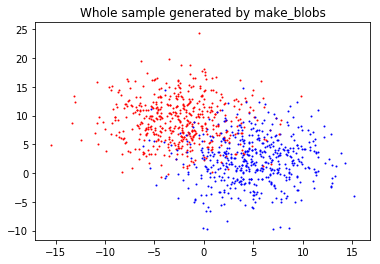

In [55]:
plot_blobs(x,y,title='Whole sample generated by make_blobs')

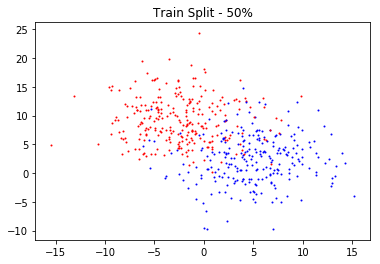

In [58]:
plot_blobs(x_train,y_train,title='Train Split - 50%')

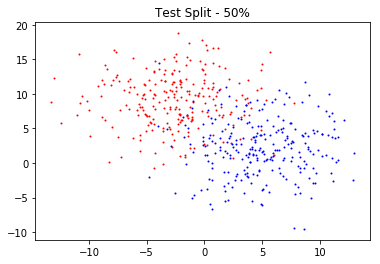

In [59]:
plot_blobs(x_test,y_test,title='Test Split - 50%')

Now, in order to work with pytorch, I will have to convert these arrays to pytorch's Variable type.

In [60]:
x_train_tensor = Variable(torch.Tensor(x_train))
y_train_tensor = Variable(torch.LongTensor(y_train))
x_test_tensor = Variable(torch.Tensor(x_test))
y_test_tensor = Variable(torch.LongTensor(y_test))

The next cell is where the neural network is designed.

'torch.manual_seed()' is used to make sure that anyone who replicated this notebook will get exactly the same results as I do when running it. 

'input_size' is the input layer, which, in this problem, is pretty much fixed. It's a 2 neurons layers, whose neurons represent x1 and x2.

'hidden_size' is the hidden layer, that sits between the input and the output. Unlike the other 2 layers (input and output), the hidden layer can have a variable number of neurons.

In [61]:
torch.manual_seed(142) # We set this seed so that the results are the same no matter who might replicate this notebook

input_size = 2 # x is 2-D since there are 2 inputs (x1,x2)
hidden_size = 2 # number of neurons in the hidden layers
output_size = 2 # y is 2-D since there are 2 classes (0,1)

model = torch.nn.Sequential(
    torch.nn.Linear(input_size,hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size,output_size),

)

The neural network is already built! 

To test it, we can pass any 2-D input and it will spit out a 2-D output, which follow the Sequential set above. It's useful to remember that the network was initialized with random weights, so the number it spits outs shouldn't mean anything by now.

In [62]:
model(torch.Tensor([5,-5])) 

tensor([-1.3125, -1.5815])

Now we have to implement the whole 'learning' part of the neural network, which is defining a loss function and tweaking the weights of the network as to minimize it.

In [63]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

CrossEntropyLoss is a kind of loss that is particularly common for classifiers. 'criterion' will basically spit out the chosen loss when given the class prediction, y_pred, and the true class, y.
The optimizer is just a function that will update the weights of the neural network as to minimize the error (criterion) in each step of the training process.

In [64]:
iteration = []
train_loss = []
test_loss = []

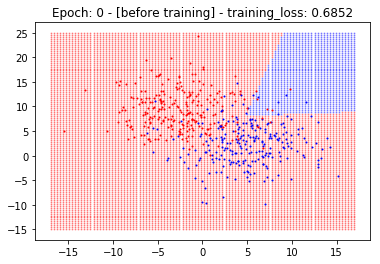

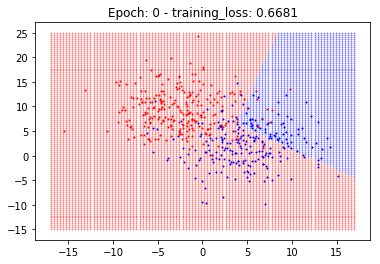

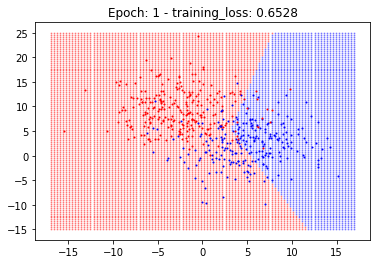

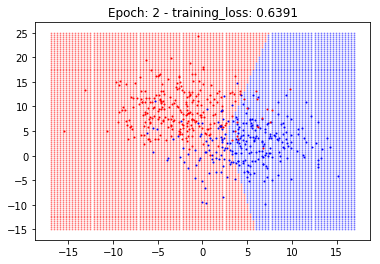

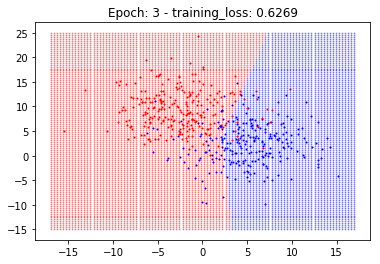

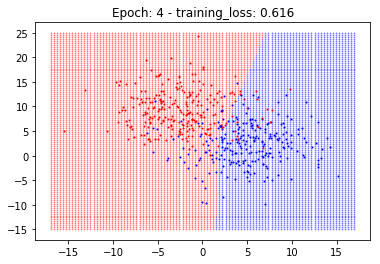

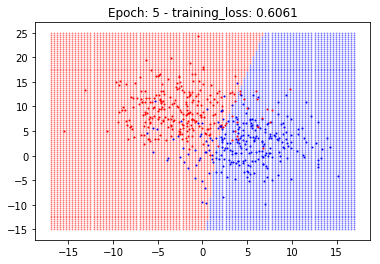

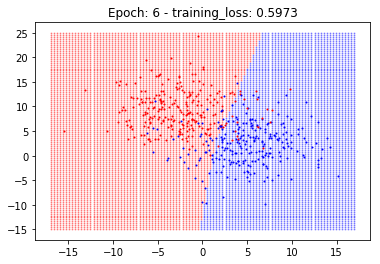

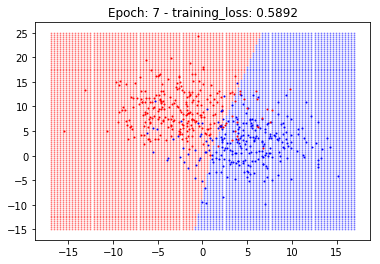

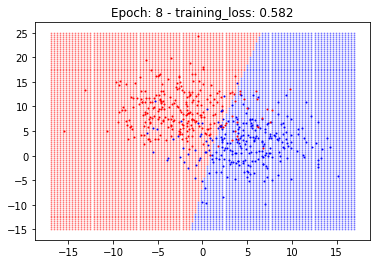

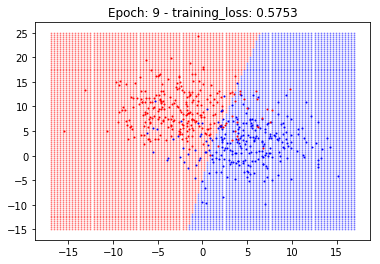

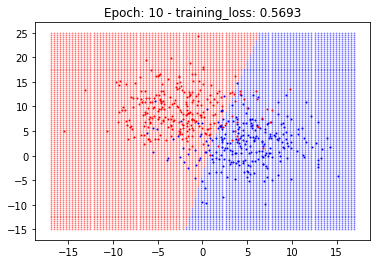

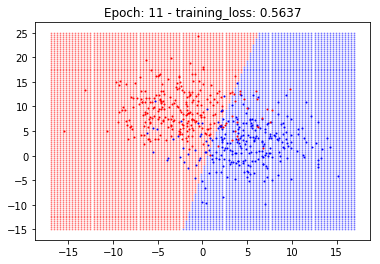

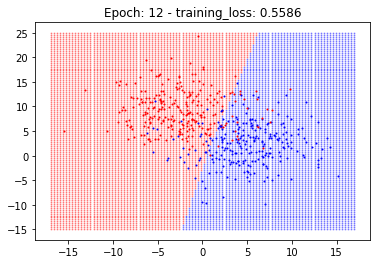

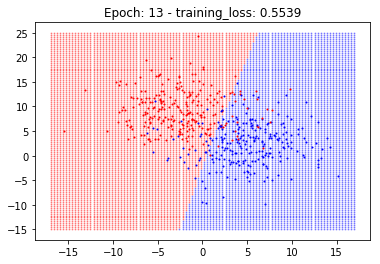

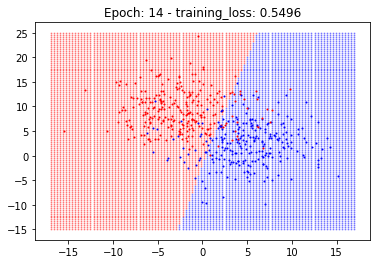

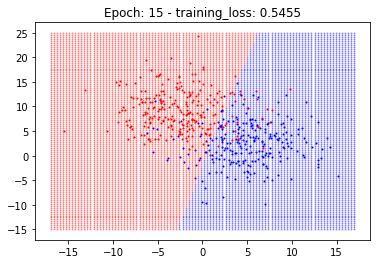

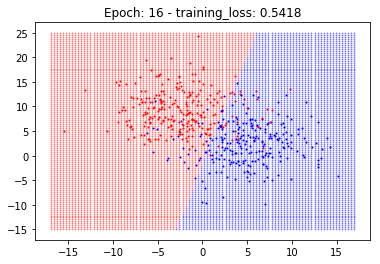

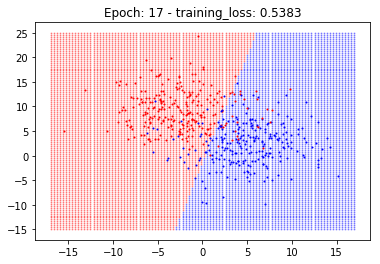

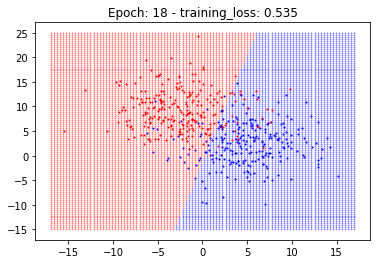

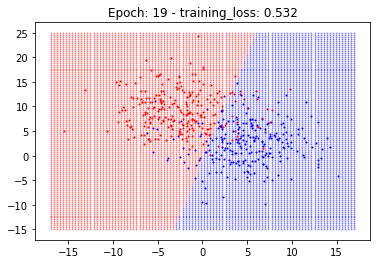

In [65]:
for i in range(20):
    if i==0:   
        take_a_look(model)
        loss_i = criterion(model(x_train_tensor), y_train_tensor)
        plot_blobs(x_train, y_train, title='Epoch: ' + str(i) + ' - [before training] - training_loss: ' + str(round(float(loss_i), 4)))
        plt.show()

    optimizer.zero_grad()

    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss_test = criterion(model(x_test_tensor), y_test_tensor)
    loss.backward()
    optimizer.step()
    
    iteration.append(i)
    train_loss.append(round(float(loss),4))
    test_loss.append(round(float(loss_test),4))
    #Visualiztion
    
    take_a_look(model)
    loss_i = criterion(model(x_train_tensor), y_train_tensor)
    plot_blobs(x_train, y_train, title='Epoch: ' + str(i) + ' - training_loss: ' + str(round(float(loss_i), 4)))
    plt.show()


As the plot suggest bellow, we're not experiencing overfitting, since the test loss seems to be even a little smallter than the train loss.

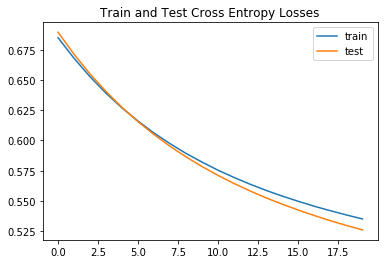

In [66]:
plt.title('Train and Test Cross Entropy Losses')
plt.plot(iteration, train_loss, label='train')
plt.plot(iteration, test_loss, label='test')
plt.legend()
plt.show()

In [67]:
torch.manual_seed(142) # We set this seed so that the results are the same no matter who might replicate this notebook

input_size = 2 # x is 2-D since there are 2 inputs (x1,x2)
hidden_size = 2 # number of neurons in the hidden layers
output_size = 2 # y is 2-D since there are 2 classes (0,1)

model = torch.nn.Sequential(
    torch.nn.Linear(input_size, hidden_size),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_size, output_size)
)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

iteration = []
train_loss = []
test_loss = []

for i in range(5000):
    optimizer.zero_grad()

    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss_test = criterion(model(x_test_tensor), y_test_tensor)
    loss.backward()
    optimizer.step()
    
    iteration.append(i)
    train_loss.append(round(float(loss),4))
    test_loss.append(round(float(loss_test),4))



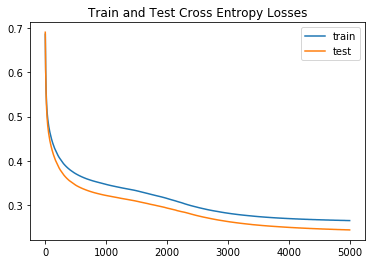

In [68]:
plt.title('Train and Test Cross Entropy Losses')
plt.plot(iteration, train_loss, label='train')
plt.plot(iteration, test_loss, label='test')
plt.legend()
plt.show()

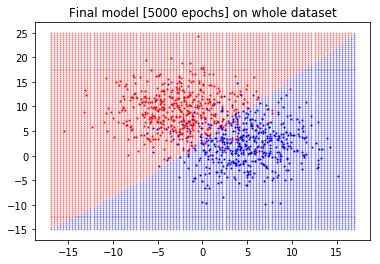

In [71]:
take_a_look(model)
plot_blobs(x,y,title='Final model [5000 epochs] on whole dataset')
plt.show()